In [1]:
"""
Description: assignment #4 for the python course. Instructions can be found
in ./description.txt
"""

'\nDescription: assignment for the python course. Instructions can be found\nin ./description.txt\n'

## General imports

In [2]:
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
%matplotlib inline

## Define functions to read the data

In [19]:
#Define function to load dataframes and a decorator to
#summarize the data.

def explain_data(func):
    def inner(*args, **kwargs):
        fpath = args[0]
        assert os.path.isfile(fpath), 'Path passed does not contain a file.'
        _df = func(*args, **kwargs)
        assert isinstance(_df, pd.DataFrame), 'File passed cannot be parsed into a dataframe.'
        print('Summarizing the retrieved data from %s' %fpath, '\n')
        print('    *Dataframe shape is ', _df.shape, '\n')
        print('    *Dataframe columns are ', _df.columns, '\n')
        print('    *Dataframe sample is', _df.head(n=5), '\n')
        return _df
    return inner

@explain_data
def get_data(fpath):
    return pd.read_csv(fpath, header=0, low_memory=False)

## Challenge - plots

In [137]:
#Load the survey data.
df_survey = get_data('./data/surveys.csv')

Summarizing the retrieved data from ./data/surveys.csv 

    *Dataframe shape is  (35549, 9) 

    *Dataframe columns are  Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object') 

   *Dataframe sample is    record_id  month  day  year  plot_id species_id sex  hindfoot_length  \
0          1      7   16  1977        2         NL   M             32.0   
1          2      7   16  1977        3         NL   M             33.0   
2          3      7   16  1977        2         DM   F             37.0   
3          4      7   16  1977        7         DM   M             36.0   
4          5      7   16  1977        3         DM   M             35.0   

   weight  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN   



#### Create a plot of average weight across all species per plot.

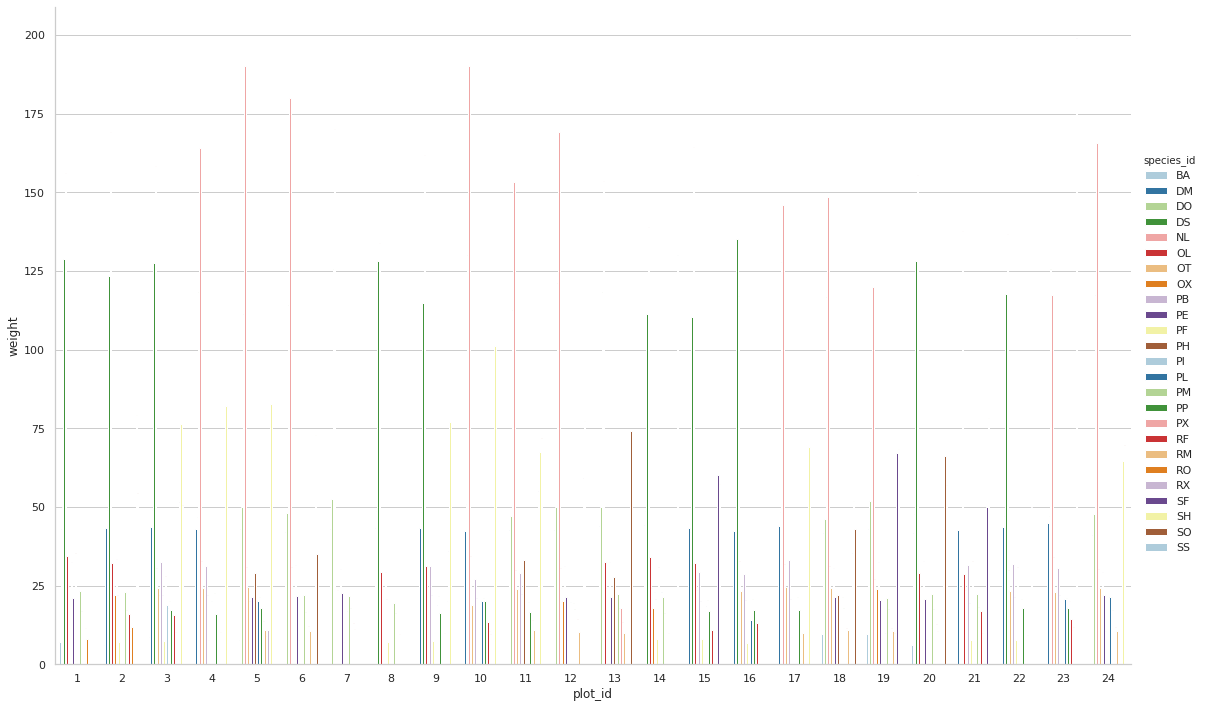

In [115]:
#Making a copy takes up more memory, but makes the code more readable.
#Unstacked bars are more meaningful here.

#Trimming for weight > 0 will remove spurious values.
df_aux = df_survey[df_survey['weight'] > 0.].copy()
df_aux = df_aux.groupby(['species_id', 'plot_id'])['weight'].mean()

#Method 1 (for personal reference).
#ax = df_aux.unstack().plot(kind='bar')

#Method 2 (with seaborn).
#See https://stackoverflow.com/questions/31845258/pandas-multi-index-plotting
sns.set(style='whitegrid')
df_aux = pd.DataFrame(df_aux).reset_index()
#fg = sns.factorplot(x='species_id', y='weight', hue='plot_id', data=df_aux,
#                    kind='bar', height=6., aspect=3., palette=sns.color_palette("Paired"))
fg = sns.factorplot(x='plot_id', y='weight', hue='species_id', data=df_aux,
                    kind='bar', height=10., aspect=1.6, palette=sns.color_palette("Paired"))


#### Use all species for average weight

Text(0, 0.5, 'Average weight using all species')

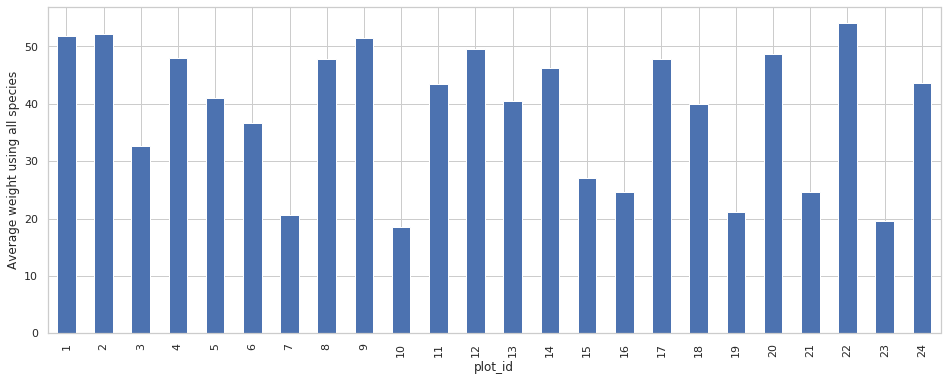

In [118]:
#Trimming for weight > 0 will remove spurious values.
df_aux = df_survey[df_survey['weight'] > 0.].copy()
df_aux = df_aux.groupby(['plot_id'])['weight'].mean()

#Method 1 (for personal reference).
ax = df_aux.plot(kind='bar')
ax.set_ylabel('Average weight using all species')

#### Create a plot of total males versus total females for the entire dataset.

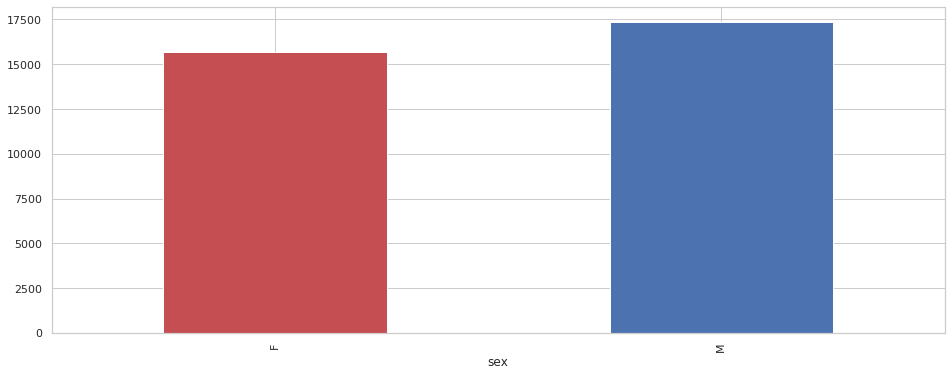

In [151]:
df_survey.groupby(['sex']).count()['record_id'].plot(kind='bar', color=['r', 'b'])

## Titanic

In [143]:
#Load the titanic data.
df_titanic = get_data('./data/Titanic_data.csv')

Summarizing the retrieved data from ./data/Titanic_data.csv 

    *Dataframe shape is  (891, 12) 

    *Dataframe columns are  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 

   *Dataframe sample is    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch      

#### Explore the data

In [121]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [153]:
#Non null values for each attribute.
df_titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
id             891
dtype: int64

In [126]:
#Drop the name column. Unlikely to be relevant.
df_titanic = df_titanic.drop(['Name'], axis=1)

In [144]:
#Removing nan from remaing columns. This is not ideal, but following
#along the instructions for reproducibility.
print(df_titanic.shape)
df_titanic_trim = df_titanic.dropna(axis=0)
print(df_titanic_trim.shape)

(891, 12)
(891, 12)


In [161]:
#Count of survivors.
df_survivors = df_titanic.groupby(['Survived']).count()['PassengerId']
print('Survived: %i' %df_survivors[1])
print('Did not survive: %i' %df_survivors[0])

Survived: 342
Did not survive: 549


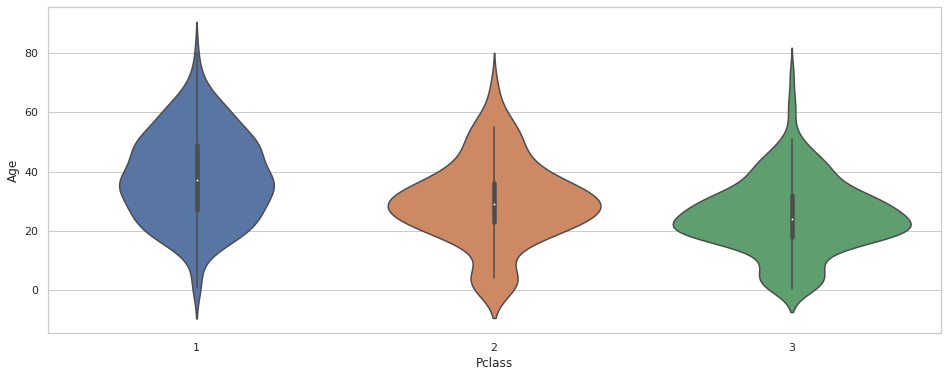

In [171]:
#Age distribution within classes.

#Drop na in the relevant columns.
df_aux = df_titanic.dropna(subset=['Age', 'Pclass'], how='all')
sns.violinplot(x=df_aux.Pclass, y=df_aux.Age)


Text(0, 0.5, 'Count')

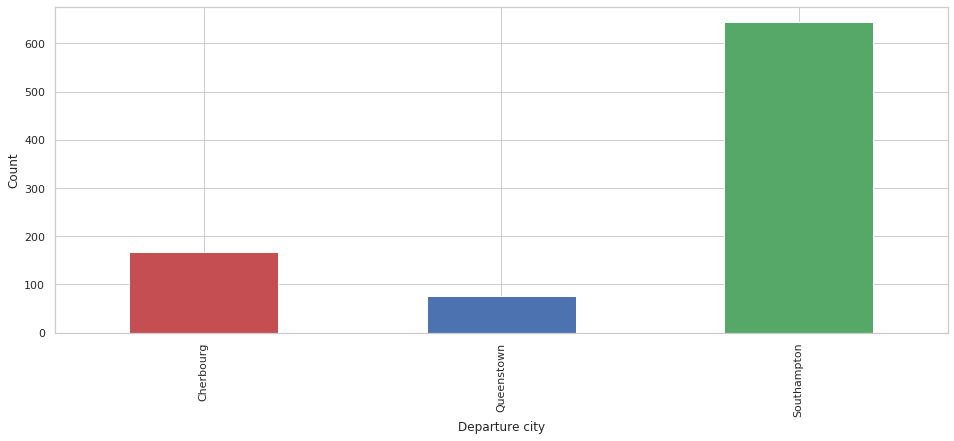

In [183]:
#Passengers per boarding location.

#Drop na in the relevant columns.
df_aux = df_titanic.dropna(subset=['Embarked'], how='all')

#Replace abbrev with port names.
df_aux = df_aux.replace({'Embarked': {'S':'Southampton', 'Q':'Queenstown', 'C':'Cherbourg'}})
ax = df_aux.groupby('Embarked').count()['PassengerId'].plot(kind='bar', color=['r', 'b', 'g'])
ax.set_xlabel('Departure city')
ax.set_ylabel('Count')

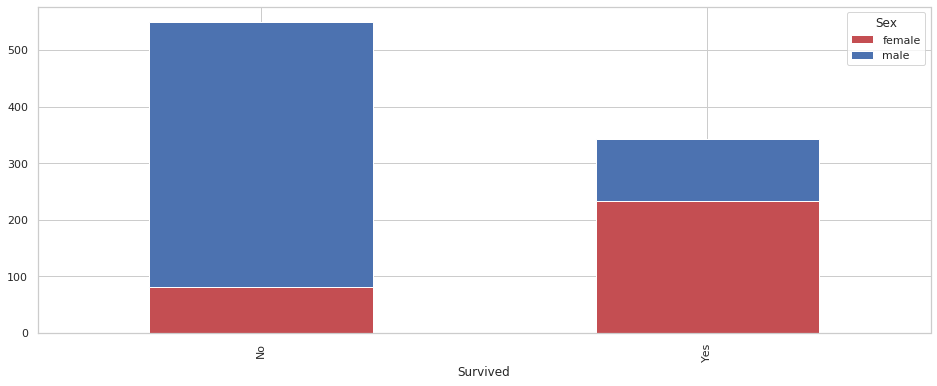

In [198]:
#Who Survived? with respect to Gender, (raw value counts)

#Drop na in the relevant columns.
df_aux = df_titanic.dropna(subset=['Survived', 'Sex'], how='all')
df_aux = df_aux.replace({'Survived': {0:'No', 1:'Yes'}})

df_survivors = df_aux.groupby(['Survived','Sex']).count()['PassengerId']
df_survivors.unstack().plot(kind='bar', color=['r', 'b'], stacked=True)

In [221]:
#Survived. Raw and proportional counts.
df_aux = df_titanic.dropna(subset=['Survived', 'Sex'], how='all')
df_aux = df_aux[df_aux['Survived']==1]
N_survivors = df_aux.shape[0]

df_aux = df_aux[df_aux['Sex']=='female']
F_survived = float(df_aux.shape[0])
M_survived = N_survivors - F_survived

print('Among survivors, %i (%.3f%%) were females'
      %(F_survived, 100.*F_survived/N_survivors))
print('Among survivors, %i (%.3f%%) were males'
      %(M_survived, 100.*M_survived/N_survivors))

Among survivors, 233 (68.129%) were females
Among survivors, 109 (31.871%) were males


26.0
10.5
[ 8.05   26.     82.6053]


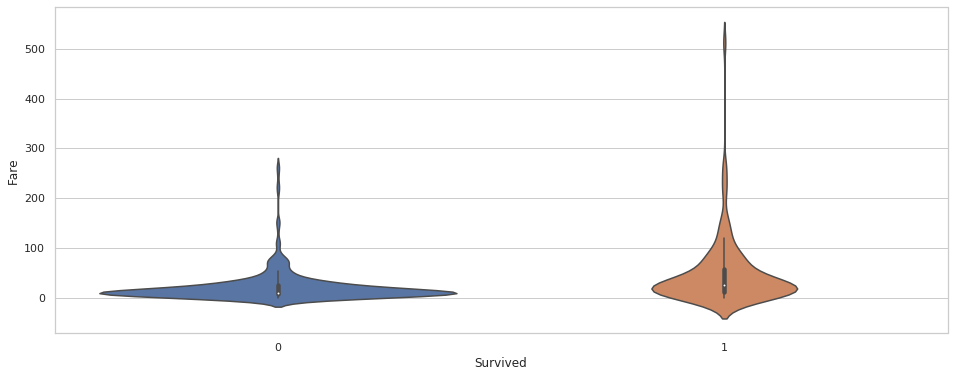

In [232]:
#Extra. Does survivability correlate with the paid fare?

#Drop na in the relevant columns.
df_aux = df_titanic.dropna(subset=['Fare', 'Survived'], how='all')
sns.violinplot(x=df_aux.Survived, y=df_aux.Fare)


Text(0, 0.5, 'Average Fair')

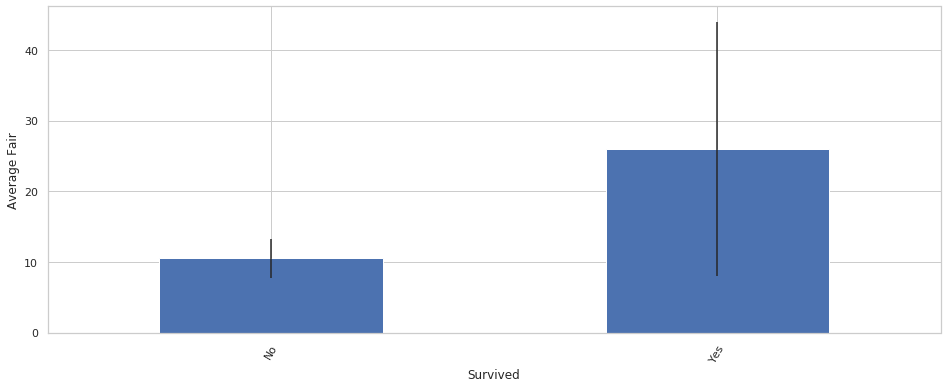

In [251]:
#There is a strong correlation between fair price and survivability.

surv_fare = df_aux[df_aux['Survived']==1].Fare
notsurv_fare = df_aux[df_aux['Survived']==0].Fare

surv_q = np.quantile(surv_fare.values,q=(0.16,0.5,0.84))
notsurv_q = np.quantile(notsurv_fare.values,q=(0.16,0.5,0.84))

df_new = pd.DataFrame({'Survived':['No', 'Yes'],
                       'Average Fair':[notsurv_q[1], surv_q[1]]})
yerr = [[notsurv_q[1] - notsurv_q[0],surv_q[1] - surv_q[0]],
        [notsurv_q[2] - notsurv_q[1],surv_q[2] - surv_q[1]]]

ax = df_new.plot.bar(x='Survived', y='Average Fair', yerr=yerr, rot=60)
ax.get_legend().remove()
ax.set_ylabel('Average Fair')


## Movies

In [258]:
#### Read the data
#File downloaded from http://files.grouplens.org/datasets/movielens/ml-100k/u.data

fpath = './data/movies.dat'
df_movies = pd.read_csv(fpath, delim_whitespace=True, low_memory=False,
                        names=['user_id', 'age', 'sex', 'occupation', 'zip_code'])
print(df_movies)

       user_id   age  sex  occupation  zip_code
0          196   242    3   881250949       NaN
1          186   302    3   891717742       NaN
2           22   377    1   878887116       NaN
3          244    51    2   880606923       NaN
4          166   346    1   886397596       NaN
...        ...   ...  ...         ...       ...
99995      880   476    3   880175444       NaN
99996      716   204    5   879795543       NaN
99997      276  1090    1   874795795       NaN
99998       13   225    2   882399156       NaN
99999       12   203    3   879959583       NaN

[100000 rows x 5 columns]
